In [1]:
import warnings

In [2]:
warnings.simplefilter('ignore')

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
sope=pd.read_csv('C:/Users/Welcome/Downloads/SolarPrediction.csv')

In [6]:
sope

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [7]:
sope.shape

(32686, 11)

In [8]:
sope.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [15]:
RK=sope.drop(['UNIXTime','Data','Time','Pressure','Humidity','WindDirection(Degrees)','Speed','TimeSunRise','TimeSunSet'],axis=1)

In [16]:
RK

,Radiation,Temperature
0,1.21,48
1,1.21,48
2,1.23,48
3,1.21,48
4,1.17,48
...,...,...
32681,1.22,44
32682,1.17,44
32683,1.20,44
32684,1.23,44


In [18]:
x=RK.iloc[:,0].values.reshape(-1,1)
y=RK.iloc[:,1].values.reshape(-1,1)

In [19]:
x

array([[1.21],
       [1.21],
       [1.23],
       ...,
       [1.2 ],
       [1.23],
       [1.2 ]])

In [20]:
y

array([[48],
       [48],
       [48],
       ...,
       [44],
       [44],
       [44]], dtype=int64)

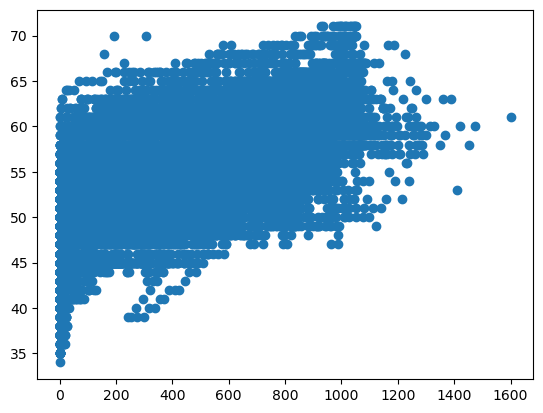

In [47]:
plt.scatter(x,y)

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.5,random_state=0)

In [26]:
x_test.shape

(16343, 1)

In [27]:
from sklearn.linear_model import LinearRegression

In [31]:
lm=LinearRegression()

In [32]:
x_train

array([[ 22.25],
       [529.22],
       [ 18.74],
       ...,
       [918.39],
       [  1.21],
       [236.08]])

In [33]:
y_train

array([[48],
       [63],
       [51],
       ...,
       [60],
       [46],
       [51]], dtype=int64)

In [34]:
lm.fit(x_train,y_train)

LinearRegression()

In [35]:
y_predict=lm.predict(x_test)

In [36]:
y_predict

array([[55.00628693],
       [53.88354289],
       [61.23989443],
       ...,
       [48.13823537],
       [48.13794711],
       [49.99977093]])

In [42]:
COMP=pd.DataFrame(x_test,columns=['Radiation'])

In [43]:
COMP

,Radiation
0,477.77
1,399.87
2,910.28
3,1.22
4,1.27
...,...
16338,1.19
16339,544.37
16340,1.24
16341,1.22


In [44]:
COMP["Temperature"]=y_test

In [45]:
COMP

,Radiation,Temperature
0,477.77,61
1,399.87,48
2,910.28,60
3,1.22,44
4,1.27,49
...,...,...
16338,1.19,45
16339,544.37,53
16340,1.24,57
16341,1.22,48
